In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from collections import defaultdict
from dateutil.parser import parse

In [2]:
filename = 'Tags.xml'
tag_list = []
i = 0
with open(filename, encoding="utf8") as f:
    for line in f:
        try:
            et = ET.fromstring(line)
        except:
            #print("Error:",line)
            continue
        if(et.tag == 'row'):
            temp_dict = et.attrib
            tag_list.append(temp_dict)
            i += 1

In [4]:
joblib.dump(tag_list, "tagData.pkl")

['tagData.pkl']

In [47]:
for e in tag_list:
    e['Count'] = int(e['Count'])

tagsDF = pd.DataFrame(tag_list)
tag_names = list(tagsDF['TagName'])

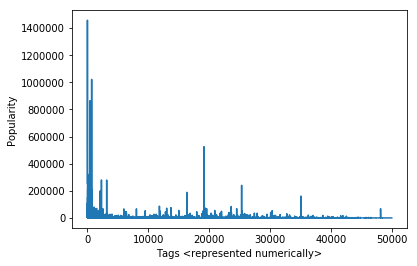

In [48]:
x = [i for i in range(0,len(list(tagsDF['TagName'])))]
y = list(tagsDF['Count'])

plt.plot(x,y)
plt.xlabel("Tags <represented numerically>")
plt.ylabel("Popularity")
plt.show()

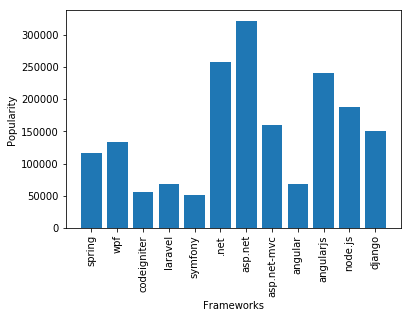

In [51]:
framewrk_tags = ['spring','wpf','codeigniter','laravel','symfony','.net','asp.net','asp.net-mvc','angular','angularjs','node.js','django']
framewrk_x = [i for i in range(0, len(framewrk_tags))]
framewrk_y = []
for e in framewrk_tags:
    idx = tag_names.index(e)
    framewrk_y.append(y[idx])
    
plt.bar(framewrk_x, framewrk_y, align='center', alpha=1)
plt.xticks(framewrk_x, framewrk_tags, rotation='vertical')
plt.ylabel('Popularity')
plt.xlabel('Frameworks')
plt.show()

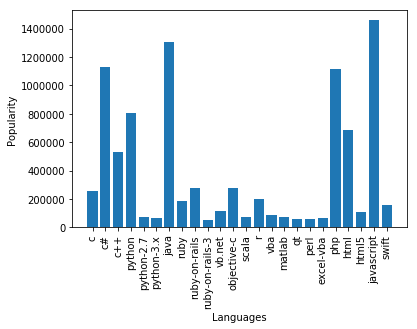

In [52]:
lng_tags = ['c','c#','c++','python','python-2.7','python-3.x','java','ruby','ruby-on-rails','ruby-on-rails-3','vb.net','objective-c','scala','r','vba','matlab','qt','perl','excel-vba','php','html','html5','javascript','swift']
lng_x = [i for i in range(0, len(lng_tags))]
lng_y = []
for e in lng_tags:
    idx = tag_names.index(e)
    lng_y.append(y[idx])
    
plt.bar(lng_x, lng_y, align='center', alpha=1)
plt.xticks(lng_x, lng_tags, rotation='vertical')
plt.ylabel('Popularity')
plt.xlabel('Languages')
 
plt.show()

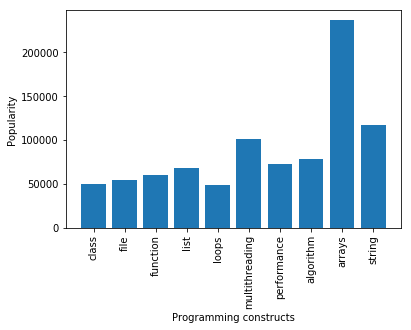

In [53]:
ds_tags = ['class','file','function','list','loops','multithreading','performance','algorithm','arrays','string']
ds_x = [i for i in range(0, len(ds_tags))]
ds_y = []
for e in ds_tags:
    idx = tag_names.index(e)
    ds_y.append(y[idx])
    
plt.bar(ds_x, ds_y, align='center', alpha=1)
plt.xticks(ds_x, ds_tags, rotation='vertical')
plt.ylabel('Popularity')
plt.xlabel('Programming constructs')
 
plt.show()

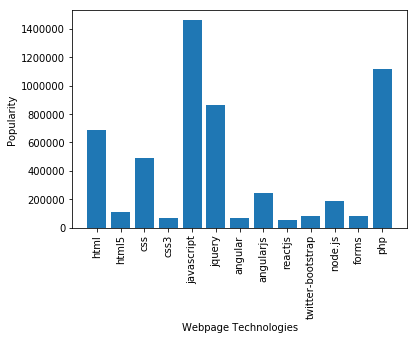

In [55]:
webpg_tags = ['html','html5','css','css3','javascript','jquery','angular','angularjs','reactjs','twitter-bootstrap','node.js','forms','php']
webpg_x = [i for i in range(0, len(webpg_tags))]
webpg_y = []
for e in webpg_tags:
    idx = tag_names.index(e)
    webpg_y.append(y[idx])
    
plt.bar(webpg_x, webpg_y, align='center', alpha=1)
plt.xticks(webpg_x, webpg_tags, rotation='vertical')
plt.ylabel('Popularity')
plt.xlabel('Webpage Technologies')
 
plt.show()

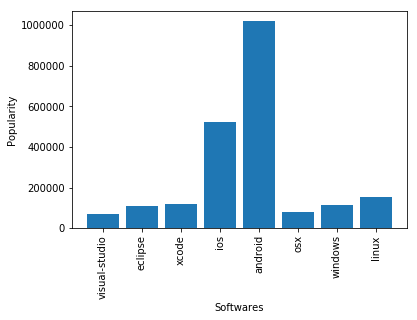

In [57]:
sft_tags = ['visual-studio','eclipse','xcode','ios','android','osx','windows','linux']
sft_x = [i for i in range(0, len(sft_tags))]
sft_y = []
for e in sft_tags:
    idx = tag_names.index(e)
    sft_y.append(y[idx])
    
plt.bar(sft_x, sft_y, align='center', alpha=1)
plt.xticks(sft_x, sft_tags, rotation='vertical')#,verticalalignment='bottom')
plt.ylabel('Popularity')
plt.xlabel('Softwares')
 
plt.show()

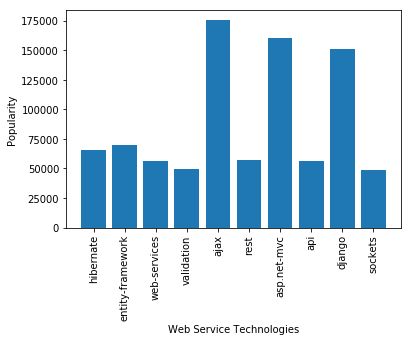

In [59]:
webs_tags = ['hibernate','entity-framework','web-services','validation','ajax','rest','asp.net-mvc','api','django','sockets']
webs_x = [i for i in range(0, len(webs_tags))]
webs_y = []
for e in webs_tags:
    idx = tag_names.index(e)
    webs_y.append(y[idx])
    
plt.bar(webs_x, webs_y, align='center', alpha=1)
plt.xticks(webs_x, webs_tags, rotation='vertical')
plt.ylabel('Popularity')
plt.xlabel('Web Service Technologies')
 
plt.show()

In [60]:
def get_temporal_count(key_tag, filename):
    count_dict = {}
    year = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
    for yr in year:
        count_dict[yr] = [0]*12
    
    i = 0
    with open(filename, encoding="utf8") as f:
        for line in f:
            if key_tag in line:
                try:
                    et = ET.fromstring(line)
                except:
                    #print("Error:",line)
                    continue
                if(et.tag == 'row'):
                    temp_dict = et.attrib
                    if(temp_dict['PostTypeId'] == '1'):
                        tmp_tags = temp_dict['Tags'].replace('<',' ').replace('>',' ').split()
                        if(key_tag in tmp_tags):
                            date = parse(temp_dict['CreationDate'], fuzzy=True)
                            mnth = date.month
                            yr = date.year
                            count_dict[yr][mnth-1] += 1
                            i += 1
                            #print(i)
    return(count_dict)

In [8]:
filepost = "Posts.xml"
count_dict_algo = get_temporal_count('algorithm',filepost)

count_dict_and = get_temporal_count('android',filepost)
count_dict_ios = get_temporal_count('ios',filepost)

count_dict_win = get_temporal_count('windows',filepost)
count_dict_osx = get_temporal_count('osx',filepost)
count_dict_lin = get_temporal_count('linux',filepost)

count_dict_py2 = get_temporal_count('python-2.7',filepost)
count_dict_py3 = get_temporal_count('python-3.x',filepost)

count_dict_react = get_temporal_count('reactjs',filepost)
count_dict_swift = get_temporal_count('swift',filepost)

In [19]:
def extract_plot_features(arg_dict):
    time = 0
    x = []
    y = []
    for yr in arg_dict:
        for mnth in range(0,12):
            if(yr == 2008):
                if mnth > 6:
                    x.append(time)
                    y.append(arg_dict[yr][mnth])
                    time += 1
            elif(yr == 2017):
                if mnth < 7:
                    x.append(time)
                    y.append(arg_dict[yr][mnth])
                    time += 1
            else:
                x.append(time)
                y.append(arg_dict[yr][mnth])
                time += 1
    return x,y

In [8]:
count_dict_algo = joblib.load('count_dict_algo.pkl')

count_dict_and = joblib.load('count_dict_and.pkl')
count_dict_ios = joblib.load('count_dict_ios.pkl')

count_dict_win = joblib.load('count_dict_win.pkl')
count_dict_osx = joblib.load('count_dict_osx.pkl')
count_dict_lin = joblib.load('count_dict_lin.pkl')

count_dict_py2 = joblib.load('count_dict_py2.pkl')
count_dict_py3 = joblib.load('count_dict_py3.pkl')

count_dict_react = joblib.load('count_dict_react.pkl')
count_dict_swift = joblib.load('count_dict_swift.pkl')

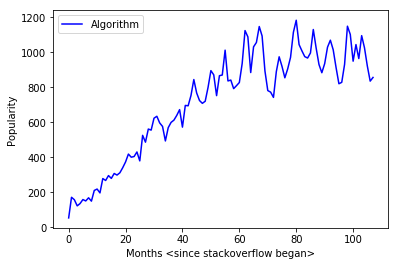

In [32]:
x, y = extract_plot_features(count_dict_algo)

plt.plot(x, y, color='blue',label='Algorithm')
plt.legend(loc='best')
plt.xlabel("Months <since stackoverflow began>")
plt.ylabel("Popularity")
plt.show()

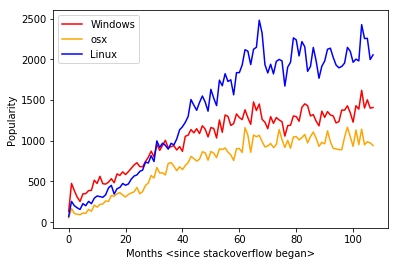

In [34]:
x, y = extract_plot_features(count_dict_win)
x1, y1 = extract_plot_features(count_dict_osx)
x2, y2 = extract_plot_features(count_dict_lin)

plt.plot(x, y, color='red',label='Windows')
plt.plot(x1, y1, color='orange',label='osx')
plt.plot(x2, y2, color='blue',label='Linux')
plt.legend(loc='best')
plt.xlabel("Months <since stackoverflow began>")
plt.ylabel("Popularity")
plt.show()

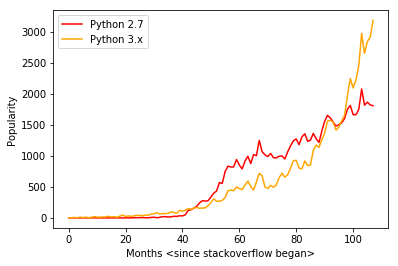

In [35]:
x, y = extract_plot_features(count_dict_py2)
x1, y1 = extract_plot_features(count_dict_py3)

plt.plot(x, y, color='red',label='Python 2.7')
plt.plot(x1, y1, color='orange',label='Python 3.x')
plt.legend(loc='best')
plt.xlabel("Months <since stackoverflow began>")
plt.ylabel("Popularity")
plt.show()

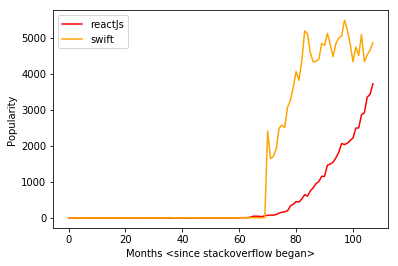

In [36]:
x, y = extract_plot_features(count_dict_react)
x1, y1 = extract_plot_features(count_dict_swift)

plt.plot(x, y, color='red',label='reactJs')
plt.plot(x1, y1, color='orange',label='swift')
plt.legend(loc='best')
plt.xlabel("Months <since stackoverflow began>")
plt.ylabel("Popularity")
plt.show()

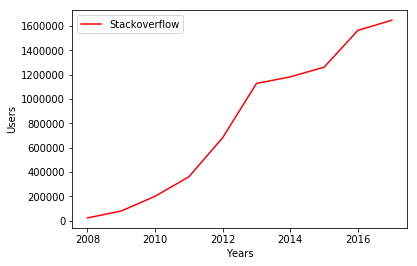

In [3]:
date = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008]
usr_joined = [1647286,1564332,1261511,1181749,1127862,681683,359903,199679,78231,21701]
plt.plot(date, usr_joined, color='red',label='Stackoverflow')
plt.legend(loc='best')
plt.xlabel("Years")
plt.ylabel("Users")
plt.show()